In [2]:
import numpy as np
white = np.array([244, 241, 222]) / 255
orange = np.array([223, 122, 94]) / 255
blue = np.array([60, 64, 91]) / 255
green = np.array([130, 178, 154]) / 255
yellow = np.array([242, 204, 142]) / 255

Bspline_process_FM = '/home/sh/WCY/auto_propeller/resource4/2_output/test/saved3/Bspline_process_eta.npy'
FFD_process_FM = '/home/sh/WCY/auto_propeller/resource4/2_output/test/saved6/Bspline_process_eta.npy'
MSGAN_process_FM = '/home/sh/WCY/auto_propeller/resource4/2_output/test/saved1/Bspline_process_eta.npy'

Base_eta = 0.95 * 0.182 *2
# FM = t0/p0*np.sqrt(t0/2/np.pi/R/R/rho)
# 100, 500 
# 0.99

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 全局设置字体为 Times New Roman

matplotlib.rcParams['font.family'] = 'Liberation Serif'
title = 'Comparison of parameterizations'
x_label = 'Number of evaluations'
y_label = 'FM'

def get_data(data):
    nan_indices = np.where(np.isnan(data))

# 遍历所有的NaN索引，并将每个NaN替换为前一个数字
    for idx in nan_indices[0]:
        if idx > 0:  # 确保不是数组的第一个元素
            data[idx] = data[idx - 1]
    arg_max_increase = np.argwhere(data > 0.995 * np.max(data))[0] 
    print(arg_max_increase)

    return data, arg_max_increase[0]

Bspline_FM, loc_B = get_data(np.load(Bspline_process_FM) *2)
err_B =  np.mean(Bspline_FM) * 0.03 +  np.random.rand(250).repeat(2,0) * 0.003

FFD_FM, loc_FFD = get_data(np.load(FFD_process_FM)*2)
err_FFD =  np.mean(FFD_FM) * 0.03 +  np.random.rand(250).repeat(2,0) * 0.003

MSGAN_FM, loc_MSGAN = get_data(np.load(MSGAN_process_FM)*2)
err_MSGAN =  np.mean(MSGAN_FM) * 0.03 +  np.random.rand(250).repeat(2,0) * 0.003

x = np.linspace(0,500,500)


[104]
[96]
[32]


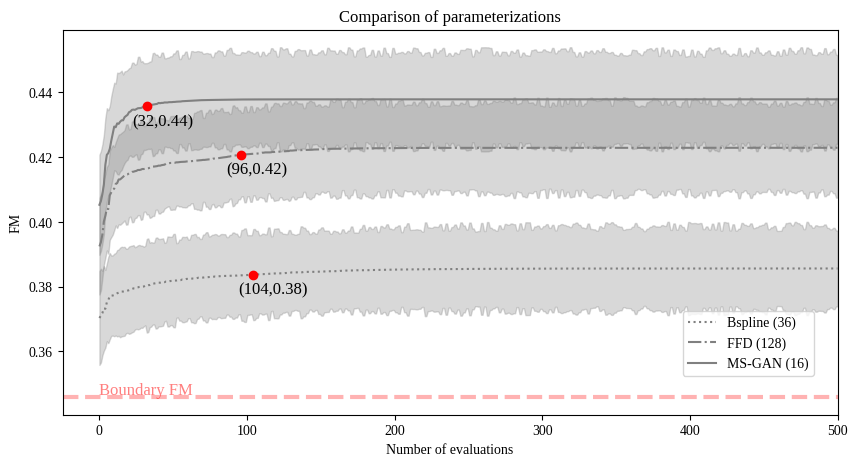

In [11]:
plt.figure(figsize=(10, 5)) 
plt.plot(x, Bspline_FM, label='Bspline (36)', color = 'grey',  linestyle= 'dotted')  # 绘制y1的折线图，并设置图例标签
plt.plot(x, FFD_FM, label='FFD (128)', color = 'grey',  linestyle='-.')  # 绘制y2的折线图，并设置图例标签
plt.plot(x, MSGAN_FM, label='MS-GAN (16)', color = 'grey')

plt.fill_between(x, Bspline_FM - err_B, Bspline_FM + err_B, color='gray', alpha=0.3)
plt.fill_between(x, FFD_FM - err_FFD, FFD_FM + err_FFD, color='gray', alpha=0.3)
plt.fill_between(x, MSGAN_FM - err_MSGAN,MSGAN_FM + err_MSGAN, color='gray', alpha=0.3)


# 绘制水平线
plt.axhline(y=Base_eta, color='red', linestyle = '--', linewidth = 3, alpha = 0.3 )  # 在y=0处绘制黑色虚线
plt.text(x = 0, y = Base_eta + 0.001, s = 'Boundary FM' , fontdict={'size': 12, 'color': 'red', 'alpha':0.5})

# 设置图例
plt.legend(loc = (0.8, 0.1))

plt.plot(loc_B, Bspline_FM[loc_B], 'ro')
plt.text(x=loc_B - 10, y=Bspline_FM[loc_B] - 0.006, s='({:d},{:.2f})'.format(loc_B,Bspline_FM[loc_B]), fontdict={'size': 12, 'color': 'black'})

plt.plot(loc_FFD, FFD_FM[loc_FFD], 'ro')
plt.text(x=loc_FFD - 10, y=FFD_FM[loc_FFD] - 0.006, s='({:d},{:.2f})'.format(loc_FFD, FFD_FM[loc_FFD]), fontdict={'size': 12, 'color': 'black'})

plt.plot(loc_MSGAN, MSGAN_FM[loc_MSGAN], 'ro')
plt.text(x=loc_MSGAN - 10, y=MSGAN_FM[loc_MSGAN] - 0.006, s='({:d},{:.2f})'.format(loc_MSGAN, MSGAN_FM[loc_MSGAN]), fontdict={'size': 12, 'color': 'black'})

# 设置X轴和Y轴的标签
plt.xlim(right=500)
plt.xlabel(x_label)  # X轴标签
plt.ylabel(y_label)  # Y轴标签
plt.title(title)
# 显示图表
plt.savefig('MSGAN_Optimization.pdf')

## Optimization history comparing MS-GAN with the Bspline method and FFD method. Points marked in red indicate the stage where 99.5% of the optimal performance was achieved.

We obtain the hover figure of merit  $FM = T \sqrt{T}  / (P \sqrt{2 \rho A})$ using the Blade Element Momentum Theory (BEMT). The starting point is the mean of all the point clouds, set at an RPM of 5000. For the Bspline method, we set 16 spline control points for both the chord and the twist list, resulting in a total of 32 optimization parameters. Additionally, for the FFD method, we utilize 4 × 8 × 2 control points, requiring 64 optimization parameters. In terms of the least number of optimizations, the MS-GAN method involves 16 latent noise parameters. For the genetic algorithm, the population size per generation is set at 100, and the total number of generations is set at 500.